In [13]:
import numpy as np
import matplotlib.pyplot as plt
import general_functions
from scipy.linalg import expm
import time as tm

In [14]:
N=10
k=3

T=10
num_steps=1001
tspan=np.linspace(0, T, num_steps)

In [15]:
Ut = np.loadtxt("U_10.txt")
Jt = np.loadtxt("J_10.txt")
Dt = np.loadtxt("Delta_10.txt")

vecU = []
J = []
Delta = []

for j in range(len(Ut)):
    Uvec = [Ut[j],Ut[j],Ut[j]]
    vecU.append(Uvec)
    J.append(Jt[j])
    Delta.append(Dt[j])

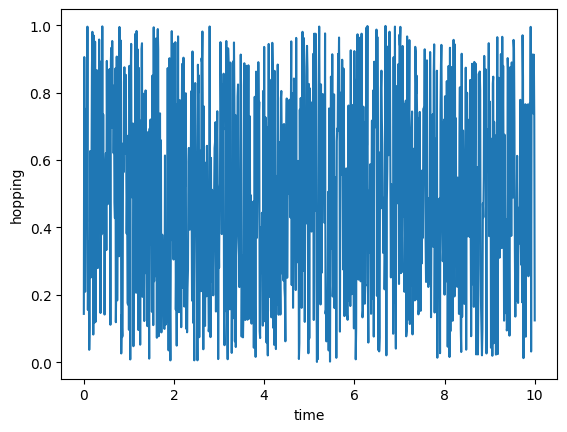

In [16]:
plt.figure()
plt.xlabel("time")
plt.ylabel("hopping")
plt.plot(tspan, Jt)

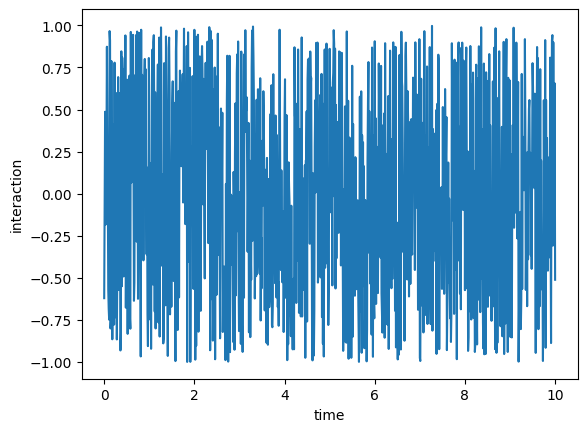

In [17]:
plt.figure()
plt.xlabel("time")
plt.ylabel("interaction")
plt.plot(tspan, Ut)

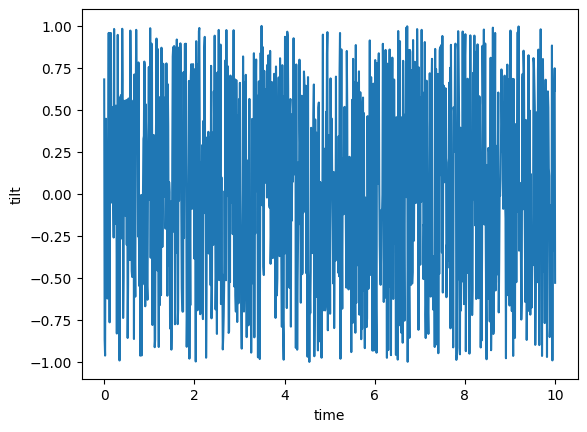

In [18]:
plt.figure()
plt.xlabel("time")
plt.ylabel("tilt")
plt.plot(tspan, Dt)

In [19]:
def tevol(N, k, psi0, T, num_steps, J, vecU, Delta):
    tspan=np.linspace(0, T, num_steps)
    M=general_functions.common_matrices(N, k)
    Interaction=M["Interaction"]
    Sz=M["Sz"]
    Szd=np.diag(Sz)
    Hopping=M["Hopping"]
    dt=tspan[1]-tspan[0]
    
    psi_list=[]
    FI=[]
    psi=psi0
        
    for j in range(num_steps):
        psi_list.append(psi)
        FI.append(general_functions.fisher_info_pure(psi, Sz))
        psi=np.exp(-1j*dt*np.dot(vecU[j], Interaction))*psi
        psi=np.exp(-1j*dt*Delta[j]*Szd)*psi
        psi=np.dot(expm(-1j*dt*J[j]*Hopping), psi)
        #print(np.sum(np.abs(psi)**2))
        
    
    return tspan, FI, psi_list

In [20]:
# S=general_functions.common_states(N, k)
# psi0=S["SQL"]
psi0 = np.zeros(66)
psi0[0] = 1

tspan, FI, psi_list=tevol(N, k, psi0, T, num_steps, J, vecU, Delta)

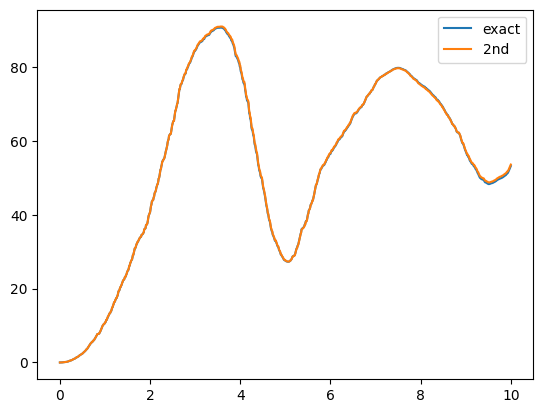

In [21]:
FI_tn = np.loadtxt("QFI_10.txt")

plt.figure()
plt.plot(tspan, np.array(FI), label="exact")
plt.plot(tspan, np.array(FI_tn), label="2nd")
plt.legend()

In [22]:
psif = psi_list[-1]

psiMPS_re = np.loadtxt("psi_re.txt")
psiMPS_im = np.loadtxt("psi_im.txt")
psiMPS = psiMPS_re + 1j*psiMPS_im

# Compare psif and psiMPS
print("Shape of psif:", psif.shape)
print("Shape of psiMPS:", psiMPS.shape)

# Fidelity (overlap squared)
fidelity = np.abs(np.vdot(psif, psiMPS))**2
print(f"\nFidelity |<psif|psiMPS>|^2 = {fidelity:.10f}")

# Norm of difference
norm_diff = np.linalg.norm(psif - psiMPS)
print(f"Norm of difference ||psif - psiMPS|| = {norm_diff:.10f}")

# Check normalization
print(f"\n||psif||^2 = {np.vdot(psif, psif).real:.10f}")
print(f"||psiMPS||^2 = {np.vdot(psiMPS, psiMPS).real:.10f}")

Shape of psif: (66,)
Shape of psiMPS: (66,)

Fidelity |<psif|psiMPS>|^2 = 0.0189088673
Norm of difference ||psif - psiMPS|| = 1.5072906382

||psif||^2 = 1.0000000000
||psiMPS||^2 = 1.0000000000
